#Hw 3.2

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/prostate.csv')

In [6]:
df.head()

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [8]:
y = df['lpsa']
X = df[df.columns[1:-2]]

In [61]:
lamb = np.arange(0,8,0.05)
alpha = np.arange(0,3.2,0.02)
sol_l2 = np.zeros((len(lamb), len(X.columns)))
sol_l1 = np.zeros((len(lamb), len(X.columns)))
for i in range(len(lamb)):
  l2 = Ridge(alpha=i)
  l2.fit(X,y)
  sol_l2[i,:] = l2.coef_
  l1 = Lasso(alpha=alpha[i])
  l1.fit(X,y)
  sol_l1[i,:] = l1.coef_

<ipython-input-61-24f8b5e671ca>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  l1.fit(X,y)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.153e+01, tolerance: 1.279e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'solution path of Lasso')

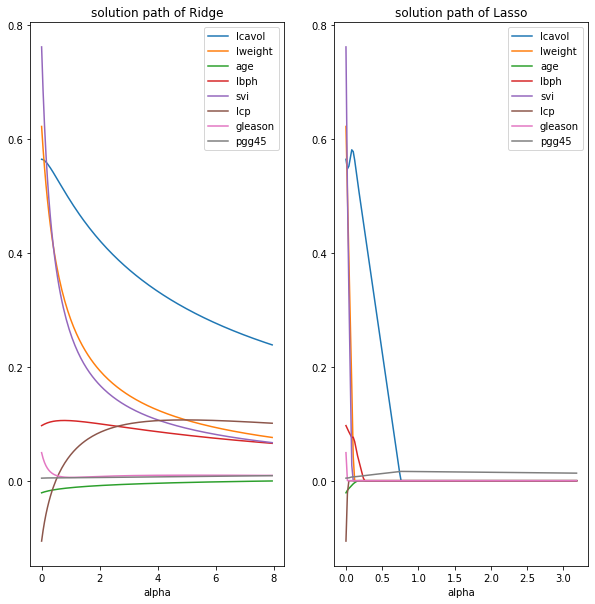

In [64]:

def plot(sol,lamb,legend):
  plt.plot(lamb,sol,label=legend)
  plt.legend()
  plt.xlabel('alpha')

plt.subplots(1,2,figsize=(10,10))

plt.subplot(1,2,1)
for i in range(sol_l2.shape[1]):
  plot(sol_l2[:,i],lamb,X.columns[i])
plt.title('solution path of Ridge')
plt.subplot(1,2,2)
for i in range(sol_l1.shape[1]):
  plot(sol_l1[:,i],alpha,X.columns[i])
plt.title('solution path of Lasso')